Source:

The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness, X2 Surface Area, X3 Wall Area, X4 Roof Area, X5 Overall Height, X6 Orientation, X7 Glazing Area, X8 Glazing Area Distribution,

y1 Heating Load,y2 Cooling Load

In [1]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and Reading the Dataset
df_en= pd.read_csv('../input/EnergyEff_UCI.csv")

In [3]:
df_en.describe().iloc[:3]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306


In [4]:
# check to see if there are any missing entries
df_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.0 KB


In [5]:
#check column names
df_en.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

### Exploratory Data Analysis

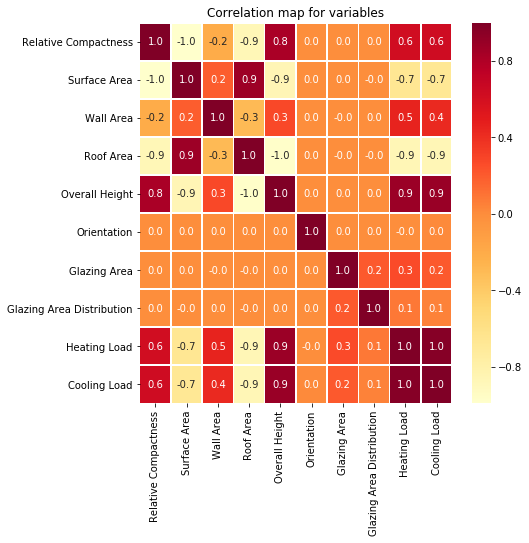

In [6]:
#correlation map for features
f,ax = plt.subplots(figsize=(7, 7))
ax.set_title('Correlation map for variables')
sns.heatmap(df_en.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap="YlOrRd")

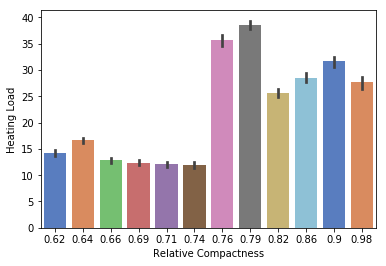

In [7]:
#Getting an idea about the distribution of Relative Compactness vs Heating Load
p = sns.barplot(data=df_en, x = 'Relative Compactness',y='Heating Load', palette='muted')

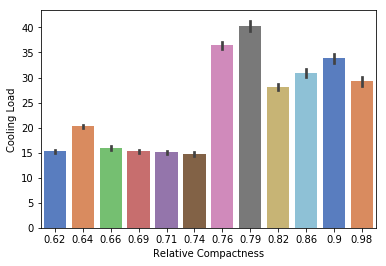

In [8]:
#Getting an idea about the distribution of Relative Compactness vs Cooling Load
p = sns.barplot(data=df_en, x = 'Relative Compactness',y='Cooling Load', palette='muted')

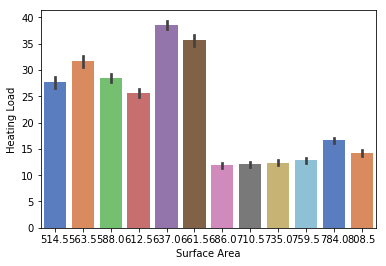

In [9]:
#Getting an idea about Surface Area vs Heating Load
p = sns.barplot(data=df_en, x = 'Surface Area',y='Heating Load', palette='muted')

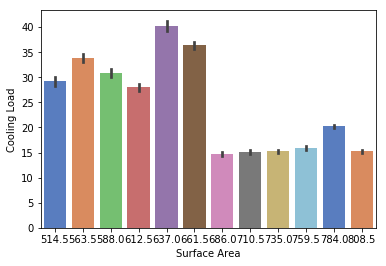

In [10]:
#Getting an idea about Surface Area vs Cooling Load
p = sns.barplot(data=df_en, x = 'Surface Area',y='Cooling Load', palette='muted')

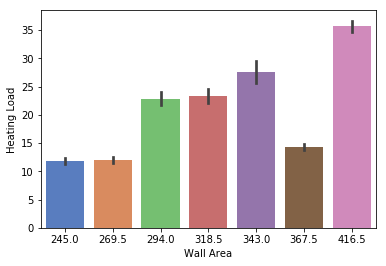

In [11]:
#Getting an idea about Wall Area vs Heating Load
p = sns.barplot(data=df_en, x = 'Wall Area',y='Heating Load', palette='muted')

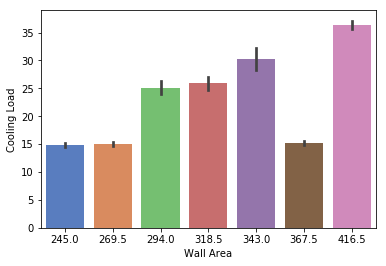

In [12]:
#Getting an idea about Wall Area vs Cooling Load
p = sns.barplot(data=df_en, x = 'Wall Area',y='Cooling Load', palette='muted')

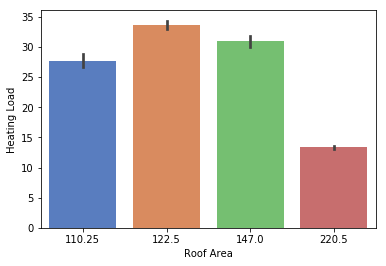

In [15]:
#Getting an idea about Roof Area vs Heating Load
p = sns.barplot(data=df_en, x = 'Roof Area',y='Heating Load', palette='muted')

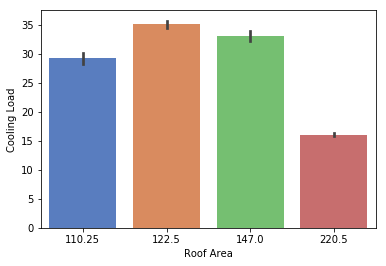

In [16]:
#Getting an idea about Roof Area vs Cooling Load
p = sns.barplot(data=df_en, x = 'Roof Area',y='Cooling Load', palette='muted')

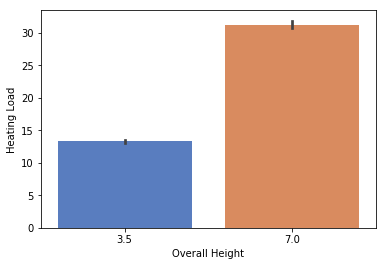

In [17]:
#Getting an idea about Overall Height vs Heating Load
p = sns.barplot(data=df_en, x = 'Overall Height',y='Heating Load', palette='muted')

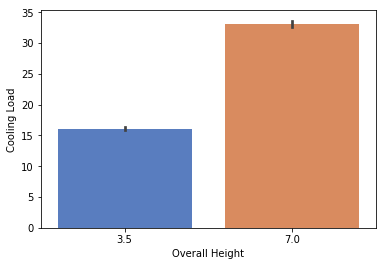

In [18]:
#Getting an idea about Overall Height vs Cooling Load
p = sns.barplot(data=df_en, x = 'Overall Height',y='Cooling Load', palette='muted')

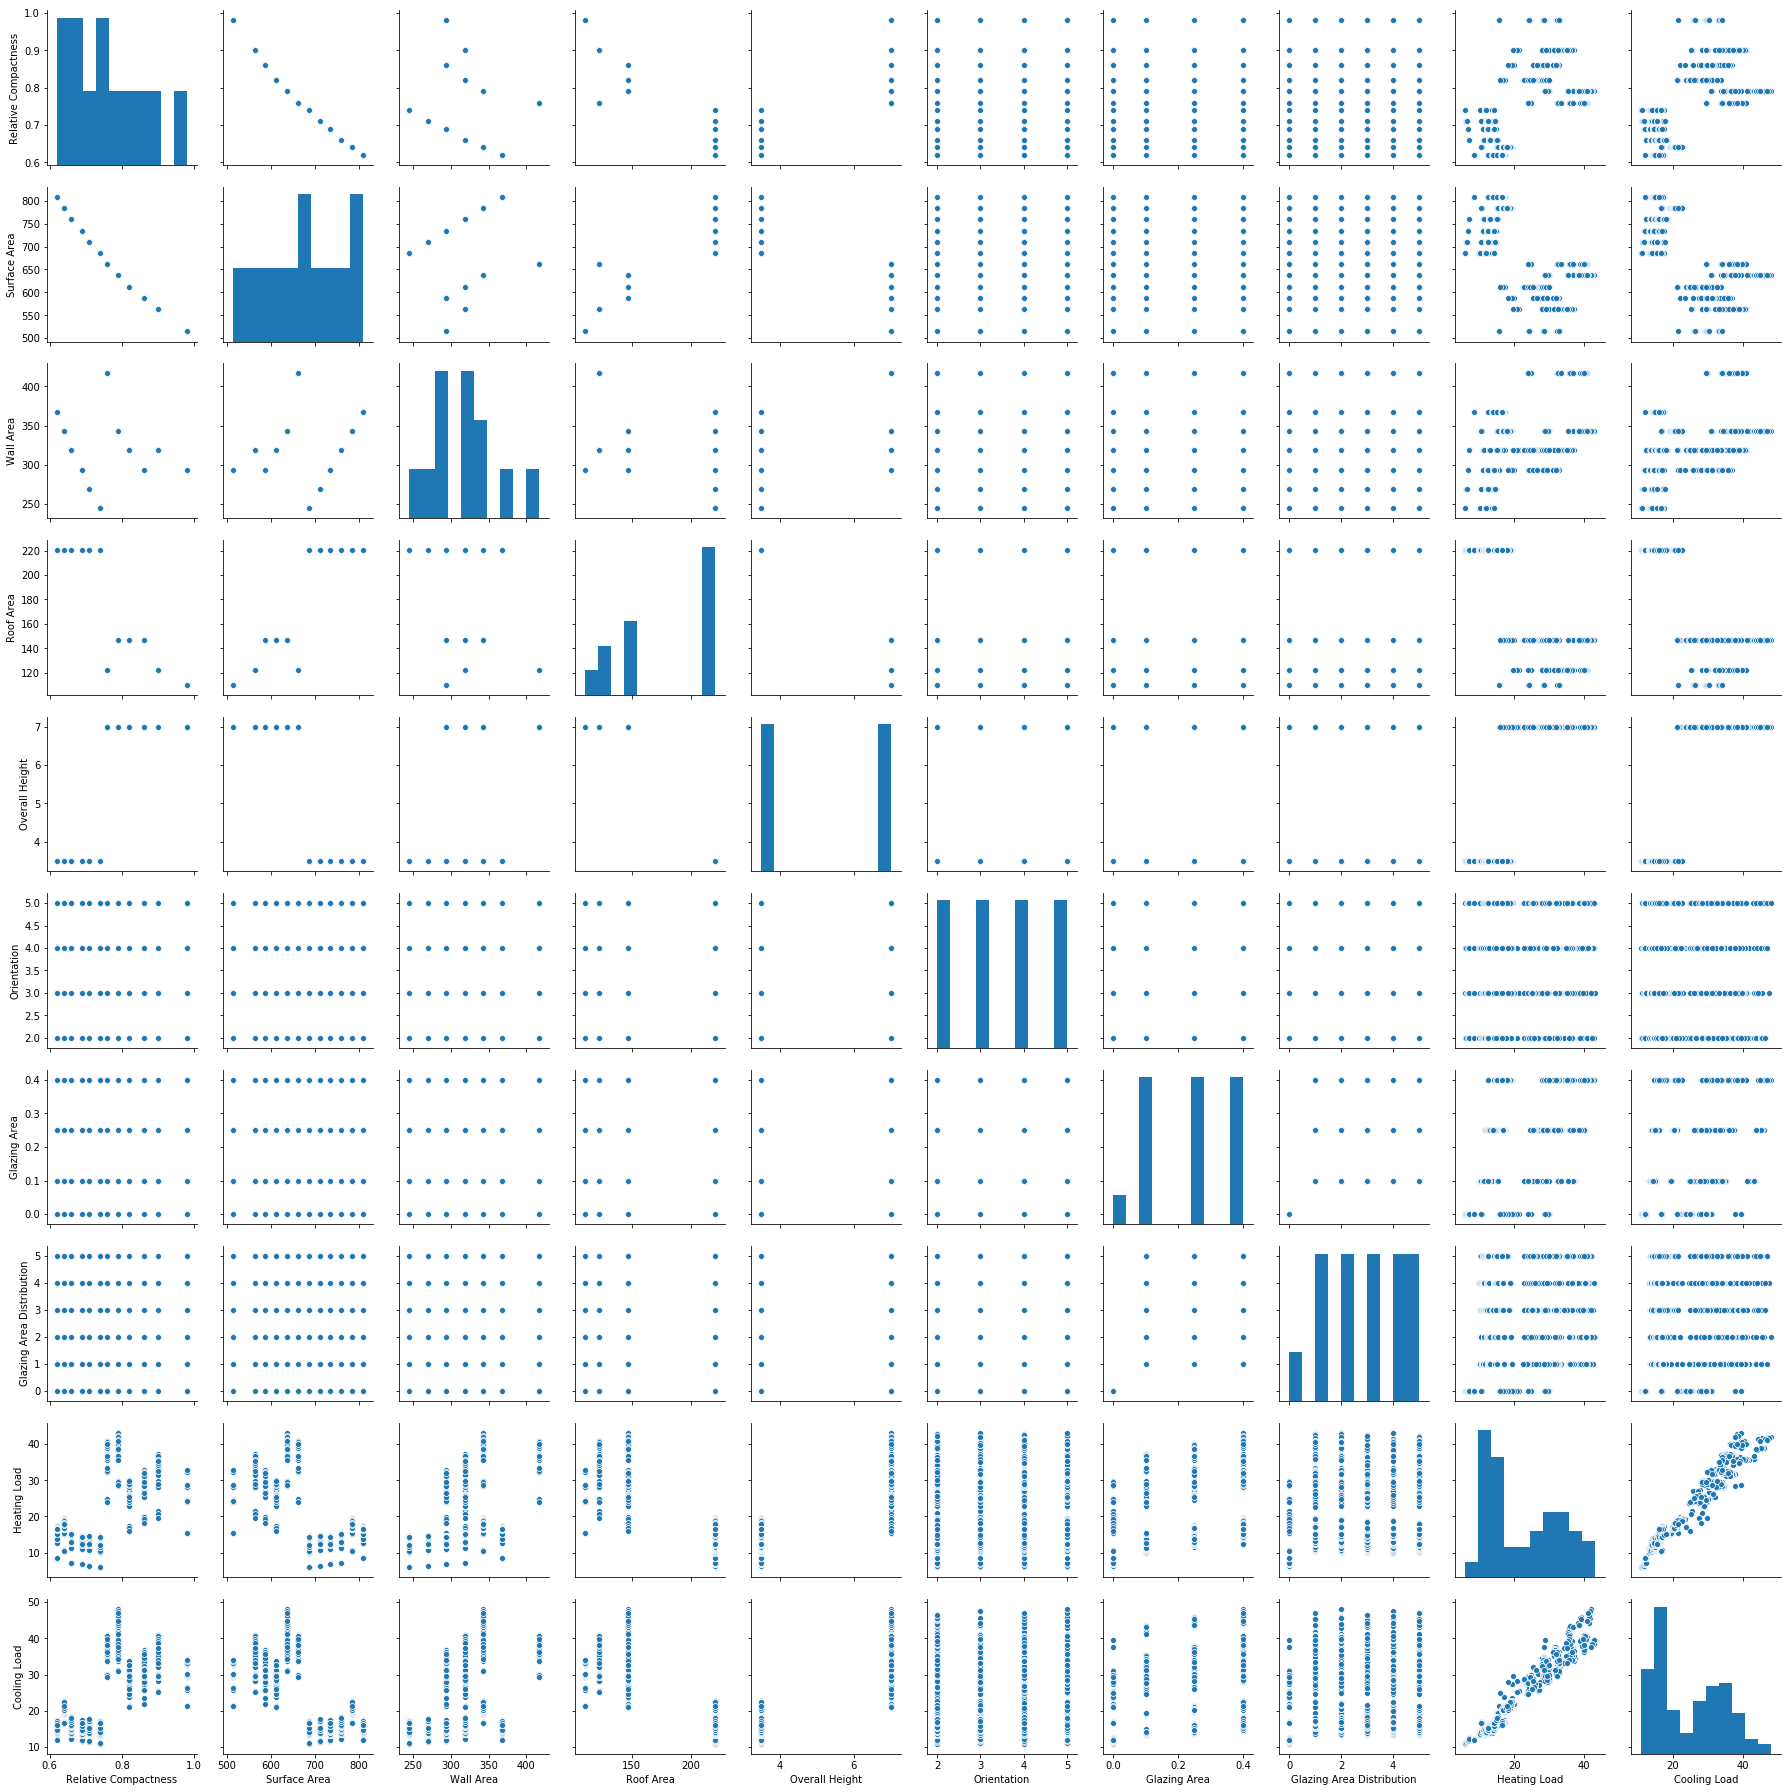

In [19]:
g = sns.pairplot(df_en,palette="husl")

In [20]:
#converting float outcomes to int for the regressor and checking Datatypes
df_en.astype({'Heating Load': 'int64','Cooling Load': 'int64'}).dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                   int64
Cooling Load                   int64
dtype: object

In [21]:
# Defining X and y
X = df_en.drop(['Heating Load','Cooling Load'], axis=1)
y = df_en['Heating Load']

# Training the model
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [22]:
#Random Forest Trial
# Load random forest classifier 
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor 
 
 # create regressor object 
reg= RandomForestRegressor(n_estimators = 200, random_state = 42) 
  
# fit the regressor with x and y data 
reg.fit(X_train, y_train)   

# predict the response

acc_rfr = round(reg.score(X_test,y_test)* 100, 2)
print("Random Forest Regressor Accuracy:",acc_rfr,"%")

Random Forest Regressor Accuracy: 99.77 %


In [23]:
y_pred = reg.predict(X_test)
df_en = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_en.iloc[:5]

,Actual,Predicted
668,16.47,15.54195
324,13.17,13.14995
624,32.82,32.77775
690,41.32,42.07765
473,16.69,16.87905


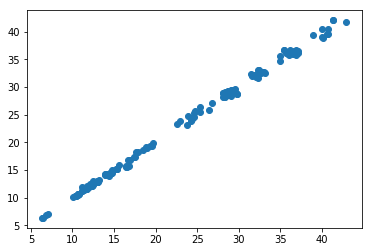

In [24]:
plt.scatter(y_test,y_pred)

In [25]:
# create regressor object

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

# fit the regressor with x and y data 
reg.fit(X_train, y_train)

# predict the response

acc_linreg = round(reg.score(X_test,y_test)* 100, 2)
print("Linear Regression Accuracy:",acc_linreg,"%")

Linear Regression Accuracy: 91.19 %


In [26]:
y_pred = reg.predict(X_test)
df_en = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_en.iloc[:5]

,Actual,Predicted
668,16.47,18.895645
324,13.17,14.014315
624,32.82,31.354515
690,41.32,35.889683
473,16.69,15.363535


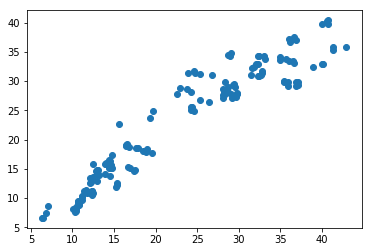

In [27]:
plt.scatter(y_test,y_pred)

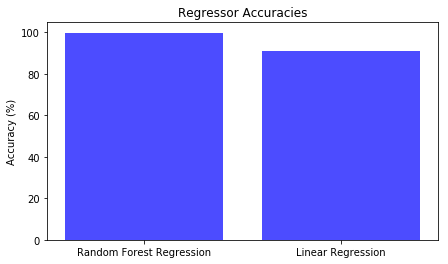

In [39]:
#visualizing both algorithm accuracies for Heating Load using Matplotlib
acc = ('Random Forest Regression', 'Linear Regression')
x_pos = np.arange(len(acc))
accuracy = [acc_rfr, acc_linreg]
plt.figure(figsize = (7,4))
plt.bar(x_pos, accuracy, alpha=0.7,align='center', color='b')
plt.xticks(x_pos, acc)
plt.ylabel('Accuracy (%)')
plt.title('Regressor Accuracies')
plt.show()

Both Random Forest Regression and Linear Regression are applicable to the Heating & Cooling Load value prediction. Good prediction capability of both is evident by the higher value of accuracies (both accuracies >90%). Random Forest Regression seems to give a better accuracy than Linear Regression.